In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/plot-data.csv'
df = pd.read_csv(file_path)
df.head()

# x = [37898.005301469326, 11013.57884631407, 7201.812929601966, 1725.4287043731947, 2260.9824019959838, 3808.13447849839, 2850.5332613020237, 5823.698802827299, 5495.936076853779, 4894.712720922551, 4275.892143052126, 3391.546774605211, 20828.50145771417, 15292.759593156241, 12129.891900397653, 10000, 8568.672305737293, 6929.000674764774, 5823.698802827299, 4709.291688081808, 3735.3100829125096, 2490.152996473545, 223926.02245173513, 95748.52126495767, 51616.404380465574, 36462.324509432154, 26771.51545420944, 21234.59709748593, 15590.924250055186, 17847.291911159613, 12853.285764416976, 10596.372886056477, 8568.672305737293, 6796.488767471241, 4275.892143052126, 3200.667635118871, 1029386.8508027706, 170885.1809077573, 116141.92125668626, 83643.38688063528, 61412.877432388086, 7780.09802744998, 48711.389204117586, 40158.1395812115, 34410.19384794593, 31243.426254184425, 25264.79177553053, 22070.656810371023, 18195.2304072717, 15292.759593156241, 11897.937907435859, 1069916.4106987666, 554924.9978277811, 241906.64525741126, 130407.77088740446, 103436.67238082628, 86936.63825239972, 77426.27701955798, 55761.05486632187, 63830.97034609151, 20430.17209049675, 15000.323627513291, 45969.870754752104, 37898.005301469326, 31243.426254184425, 4918400.606471699, 1049455.0670099587, 39580773.46865453, 38081344.784983896, 19373651.540097672, 19373651.540097672, 19003145.07930767, 38081344.784983896, 38823821.05507106]
# y = [70.38917075262037, 80.2030425791845, 80.37225247408281, 80.2030425791845, 80.37225247408281, 80.2030425791845, 80.54145462340323, 80.37225247408281, 80.37225247408281, 80.37225247408281, 80.54145462340323, 80.37225247408281, 70.38917075262037, 70.55837290194079, 69.88155655908123, 70.38917075262037, 70.38917075262037, 70.05075870840164, 70.38917075262037, 70.55837290194079, 70.55837290194079, 70.38917075262037, 60.067684732517115, 60.067684732517115, 60.067684732517115, 59.8984748376188, 60.067684732517115, 60.23688688183753, 60.067684732517115, 60.23688688183753, 60.23688688183753, 60.067684732517115, 60.575298926056256, 60.40608903115794, 60.067684732517115, 60.23688688183753, 50.42301505527341, 50.08460301105468, 50.42301505527341, 50.761419353914235, 50.42301505527341, 50.42301505527341, 50.761419353914235, 50.761419353914235, 50.59221720459382, 50.93062924881255, 50.59221720459382, 50.59221720459382, 50.761419353914235, 50.42301505527341, 50.253805160375094, 41.11674967667053, 41.11674967667053, 40.94754752735012, 41.285959571568846, 41.11674967667053, 41.11674967667053, 40.94754752735012, 40.778345378029705, 40.778345378029705, 41.11674967667053, 41.11674967667053, 40.94754752735012, 41.11674967667053, 41.285959571568846, 30.964465805887684, 30.456851612348544, 40.10152128959225, 33.164132474942576, 33.5025367735834, 30.456851612348544, 27.580376346012002, 30.456851612348544, 27.918780644652827]

# df = np.column_stack((x, y))
df.columns = ['x','y']
# df.head()

print(df)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
               x          y
0   3.789801e+04  70.389171
1   1.101358e+04  80.203043
2   7.201813e+03  80.372252
3   1.725429e+03  80.203043
4   2.260982e+03  80.372252
..           ...        ...
69  1.937365e+07  33.502537
70  1.937365e+07  30.456852
71  1.900315e+07  27.580376
72  3.808134e+07  30.456852
73  3.882382e+07  27.918781

[74 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

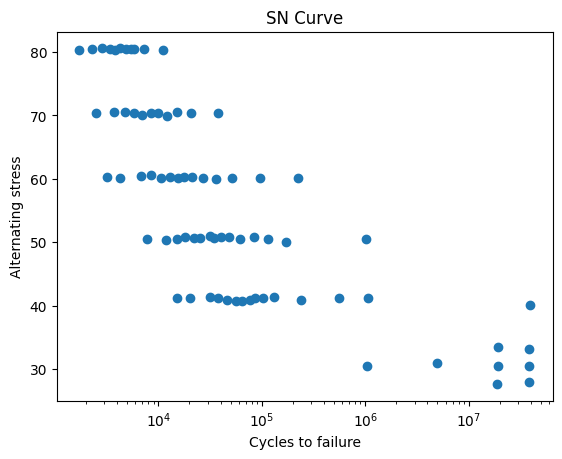

In [7]:
plt.scatter(df['x'].to_numpy(), df['y'].to_numpy())
plt.xlabel('Cycles to failure')
plt.ylabel('Alternating stress')
plt.title('SN Curve')
plt.xscale('log')
plt.show

In [9]:
df['sample_type']=0
df.loc[df['x']>1e7,'sample_type']=1

In [10]:
df

,x,y,sample_type
0,3.789801e+04,70.389171,0
1,1.101358e+04,80.203043,0
2,7.201813e+03,80.372252,0
3,1.725429e+03,80.203043,0
4,2.260982e+03,80.372252,0
...,...,...,...
69,1.937365e+07,33.502537,1
70,1.937365e+07,30.456852,1
71,1.900315e+07,27.580376,1
72,3.808134e+07,30.456852,1


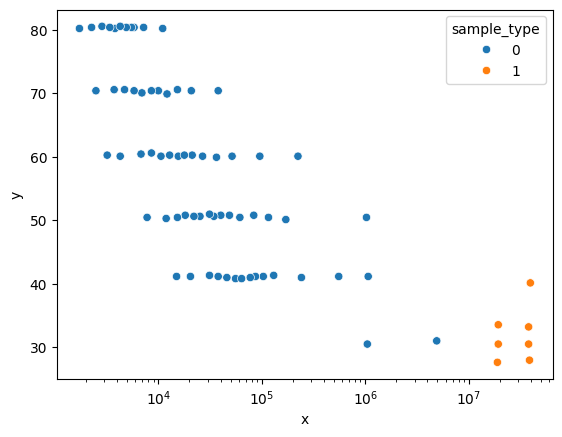

In [11]:
sns.scatterplot(x='x', y='y', hue='sample_type', data=df)
plt.xscale('log')


In [13]:
X = df[['x', 'y']].to_numpy()
y = df['sample_type'].to_numpy()

In [14]:
print(X.shape)
print(y.shape)

(74, 2)
(74,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.score(X_test, y_test)

1.0

Text(0.5, 14.722222222222216, 'Predicted label')

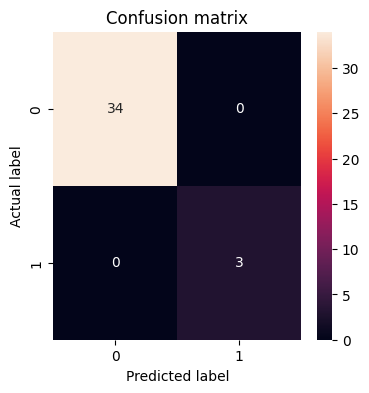

In [18]:
cm = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
